In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'sample_submission.csv', 'train.csv', 'train']


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
path = Path('../input')
path.ls()

[PosixPath('../input/test'),
 PosixPath('../input/sample_submission.csv'),
 PosixPath('../input/train.csv'),
 PosixPath('../input/train')]

In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
df.shape

(17500, 2)

In [7]:
src = ImageList.from_df(df, path/'train'/'train').filter_by_func(lambda fname: Path(fname).suffix == '.jpg').split_by_rand_pct(valid_pct = 0.2).label_from_df(cols= 1)

Now, we've obtained our image list and split it using the data given in our train.csv file by using the datablock API.


**Pre processing**

In [8]:
data = src.transform(get_transforms(flip_vert=True, do_flip=True), size=128).databunch().normalize(imagenet_stats)

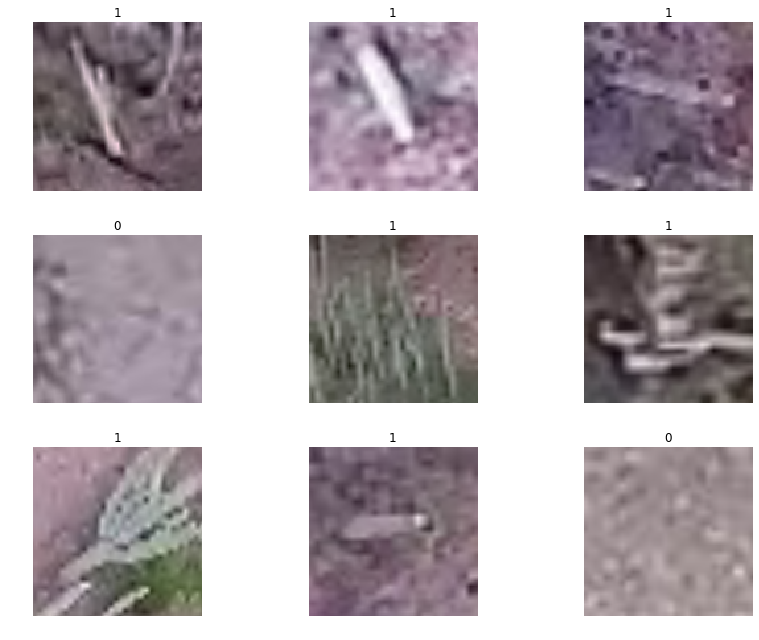

In [9]:
data.show_batch(rows=3, figsize=(12,9))

**Fitting the Model**

In [10]:
from fastai.metrics import error_rate

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 44341811.33it/s]


In [12]:
learn.fit_one_cycle(3, 0.003)

epoch,train_loss,valid_loss,error_rate,time
0,0.078007,0.029483,0.009143,15:45
1,0.029611,0.009266,0.002857,15:38
2,0.020407,0.006215,0.002000,15:30


In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

Exception: [Errno 30] Read-only file system: '../input/train/train/models'
Can't write to '../input/train/train/models', set `learn.model_dir` attribute in Learner to a full libpath path that is writable